In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281D0AB4588>,
      dtype=object)

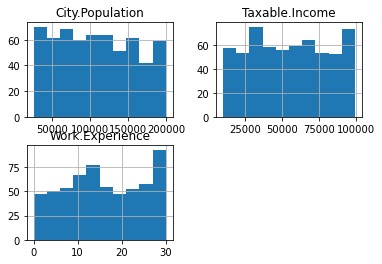

In [5]:
fraud.hist()

In [6]:
data = fraud.head()

fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

fraud["income"].unique()
fraud["income"].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [7]:
# dropping the Taxable.Income columns
fraud = fraud.drop(['Taxable.Income'],axis=1)
fraud.rename(columns={"Marital.Status":"marital","City.Population":"population","Work.Experience":"workexp"},inplace=True)
fraud.isnull().sum()

Undergrad     0
marital       0
population    0
workexp       0
Urban         0
income        0
dtype: int64

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [9]:
features = fraud.iloc[:,0:5]
labels = pd.DataFrame(fraud.iloc[:,5])
fraud["income"].value_counts()


0    476
1    124
Name: income, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, stratify=labels)

print(y_train["income"].value_counts())
print(y_test["income"].value_counts())

0    333
1     87
Name: income, dtype: int64
0    143
1     37
Name: income, dtype: int64


In [11]:
colnames = list(fraud.columns)
predictors = colnames[:5]
target = colnames[5]

fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   marital     600 non-null    int32
 2   population  600 non-null    int64
 3   workexp     600 non-null    int64
 4   Urban       600 non-null    int32
 5   income      600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [12]:
from sklearn.tree import DecisionTreeClassifier as DT

model = DT(criterion = 'entropy')
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [13]:
from sklearn.metrics import accuracy_score
#Prediciton on train data 
pred_train = pd.DataFrame(model.predict(x_train))
pred_train

,0
0,1
1,1
2,1
3,0
4,1
...,...
415,0
416,0
417,0
418,0


In [14]:
# Finding the accuracy of train data
acc_train = accuracy_score(y_train,pred_train) #100%
acc_train

1.0

In [15]:
#Prediction on test data
pred_test = pd.DataFrame(model.predict(x_test))
pred_test

,0
0,0
1,1
2,0
3,0
4,1
...,...
175,0
176,0
177,0
178,0


In [16]:
acc_test = accuracy_score(y_test,pred_test) ##68%
acc_test

0.6444444444444445

In [18]:
#Visualizing the decision trees
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

In [19]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,
                class_names = target, impurity = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [21]:
#PNG file of Decision tree
graph.write_png('fraud.png')

True